In [1]:
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                            sankey_plot, chord_plot, CellTypeTriangles, 
                            ParalogSubstitutions, FunctionalEnrichment,
                            convert_eggnog_to_homologs, GeneTriangles)
from samalg import SAM
import pandas as pd
import plotly.express as px
#NOTE:
#the package samalg is not called samalg but is instead called sam-algorithm
#Python 3.10 Works while 3.11+ does not

In [2]:
A=pd.read_csv('chicken_and_mouse\chms\maps\chms\ch_to_ms.txt',sep='\t',index_col=0,header=None)
B=pd.read_csv('chicken_and_mouse\chms\maps\chms\ms_to_ch.txt',sep='\t',index_col=0,header=None)
A.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
ND1,mt-Nd1,55.414,314,140,0,968,27,947,6,7.990000e-101,364.0
ND2,mt-Nd2,46.281,121,65,0,1,363,1,363,5.000000e-35,113.0
COX1,mt-Co1,69.355,434,133,0,1541,240,1538,237,0.000000e+00,664.0
COX2,mt-Co2,70.000,140,42,0,250,669,253,672,1.180000e-77,245.0
ATP6,mt-Atp6,63.889,108,39,0,355,678,352,675,9.430000e-27,104.0


In [3]:
B.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
Trav13-2,ENSGALG00010028649,44.000,25,14,0,67,141,385,459,9.950000e-07,29.4
Trdv5,ENSGALG00010025670,31.746,63,43,0,10,198,7,195,1.730000e-07,42.8
Trdv5,ENSGALG00010025476,34.694,49,32,0,52,198,52,198,3.230000e-07,41.8
Trgv7,ENSGALG00010017740,50.000,26,13,0,145,222,166,243,1.920000e-07,36.8
Trgv4,ENSGALG00010017740,34.722,72,47,0,196,411,145,360,2.350000e-09,59.3


In [4]:
#NOTE When loading in raw data, SAMap will automatically process them with SAM and save the results to an *_pr.h5ad file. For example, if the raw data is file.h5ad the processed data will be saved to file_pr.h5ad
fn1 = 'chicken_and_mouse\chms\chMG.h5ad' #chicken
fn2 = 'chicken_and_mouse\chms\mMG.h5ad' #mouse

In [5]:
#NOTE: SAMap expects the above to be in a dictionary keyed by the species IDs determined in the BLAST step:
filenames = {'ch':fn1,'ms':fn2}
filenamesForLater = {'ch':fn1,'ms':fn2}

In [6]:
#Load raw data mappings
sm = SAMAP(
        filenames,
        f_maps = 'chicken_and_mouse/chms/maps/',
        save_processed=True #if False, do not save the processed results to `*_pr.h5ad`
    )

Processing data ch from:
chicken_and_mouse\chms\chMG.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7065655863729171
Iteration: 2, Convergence: 0.055848253587628696
Iteration: 3, Convergence: 0.014024762898969794
Computing the UMAP embedding...


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Elapsed time: 430.0412862300873 seconds
Not updating the manifold...
Processing data ms from:
chicken_and_mouse\chms\mMG.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7180255976190718
Iteration: 2, Convergence: 0.04641549705625266
Computing the UMAP embedding...


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Elapsed time: 86.54811596870422 seconds
Not updating the manifold...
13984 `ch` gene symbols match between the datasets and the BLAST graph.
13753 `ms` gene symbols match between the datasets and the BLAST graph.


In [ ]:
sm.run(pairwise=True)

In [67]:
#START HERE WITH PREVIOUS DATA
samap.utils.load_samap('samap_object')

In [68]:
samap = sm.samap
#combine species, after this analysis is done, time for visualization
#The expression data in samap.adata is a block-diagonal matrix of each species' gene expressions.

<Axes: >

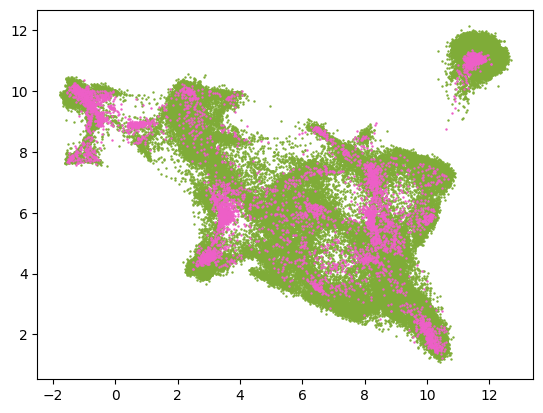

In [69]:
sm.scatter()

In [70]:
#interactive plot
sm.samap.gui()
#requires modules colorlover, plotly, ipyevent

    'data': [{'hoverinfo': 'text',
              'marker': {'size'…

In [71]:
#INVESTIGATION: Customize and label the clustering plot
#each species individually
sm.gui()

    'data': [{'hoverinfo': 'text',
              'marker': {'size'…

In [72]:
#NOTES and Investigation For Analyzing/Exporting Samap Data:
#The species ID for each cell is stored in samap.adata.obs['species']
#The combined graph is stored in samap.adata.obsp['connectivities']
#The refined homology graph is stored in samap.adata.varp['homology_graph_reweighted'] (or sm.gnnm_refined) and the gene names corresponding to this graph are stored in samap.adata.var_names (or sm.gns)
#Print adata structure
print(dir(samap.adata))

['T', 'X', '_BACKED_ATTRS', '_H5_ALIASES', '_H5_ALIASES_NAMES', '_X', '__annotations__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_adata_ref', '_check_dimensions', '_check_uniqueness', '_clean_up_old_format', '_gen_repr', '_get_X', '_get_and_delete_multicol_field', '_get_obs_array', '_get_var_array', '_has_X', '_init_as_actual', '_init_as_view', '_inplace_subset_obs', '_inplace_subset_var', '_is_view', '_layers', '_mutated_copy', '_normalize_indices', '_obs', '_obsm', '_obsp', '_oidx', '_prep_dim_index', '_raw', '_remove_unused_categories', '_sanitize', '_set_backed', '_set_dim_df', '_set_dim_index',

In [73]:
#save adata object as a pickle
import pickle
with open('samap_adata.pkl', 'wb') as file:
    pickle.dump(samap.adata, file)
with open('samap_raw_adata.pkl', 'wb') as file:
    pickle.dump(samap.adata_raw, file)

In [74]:
#Pickle the entire samap object
import samap.utils
samap.utils.save_samap(sm, 'samap_object')

In [75]:
#print entire object structure
print(dir(sm.samap))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'adata', 'adata_raw', 'calculate_mean_var', 'calculate_nnm', 'clustering', 'density_clustering', 'dispersion_ranking_NN', 'get_avg_obsm', 'get_cells', 'get_labels', 'get_labels_un', 'gui', 'hdbknn_clustering', 'identify_marker_genes_ratio', 'identify_marker_genes_rf', 'identify_marker_genes_sw', 'kmeans_clustering', 'leiden_clustering', 'load', 'load_data', 'load_obs_annotations', 'load_var_annotations', 'louvain_clustering', 'preprocess_args', 'preprocess_data', 'run', 'run_args', 'run_diff_map', 'run_diff_umap', 'run_tsne', 'run_umap', 'save', 'save_anndata', 'scatter', 'show_gene_expression']


In [76]:
#print each species new file structure
print(filenames) 

{'ch': <samalg.SAM object at 0x00000247F3C0EEC0>, 'ms': <samalg.SAM object at 0x00000247C79B16C0>}


In [86]:
#save as h5ad
sm.samap.adata.write_h5ad(filename="Samap_h5ad", compression=None, compression_opts=None, as_dense=())

In [83]:
#save as loom, requires module loompy
import anndata as ad
sm.samap.adata.write_loom("samap_adata.loom", write_obsm_varm=True)